### Packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from fredapi import Fred

In [43]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
#color palette from matplotlib list we can use to change colors in our plots
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

### to get the data set up:

In [44]:
fred_key = '724dabd3ba5b8969ebdbf78d4ea3c429'
#all data from fred website
fred = Fred(api_key=fred_key)
#series id on Fred wevsite
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-02-12,2024-02-12,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-02-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-12 08:41:03-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-02-12,2024-02-12,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-01-30 08:11:02-06:00,87,"For more information regarding the index, plea..."
SP500,SP500,2024-02-12,2024-02-12,S&P 500,2014-02-10,2024-02-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-02-09 19:11:01-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-02-12,2024-02-12,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-02-12,2024-02-12,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-02-09,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-02-12 08:41:10-06:00,81,This data represents the effective yield of th...


## Pull raw data

In [45]:
sp500 = fred.get_series(series_id='SP500')
#date and price
sp500

2014-02-10    1799.84
2014-02-11    1819.75
2014-02-12    1819.26
2014-02-13    1829.83
2014-02-14    1838.63
               ...   
2024-02-05    4942.81
2024-02-06    4954.23
2024-02-07    4995.06
2024-02-08    4997.91
2024-02-09    5026.61
Length: 2610, dtype: float64

<Axes: title={'center': 'S&P 500'}>

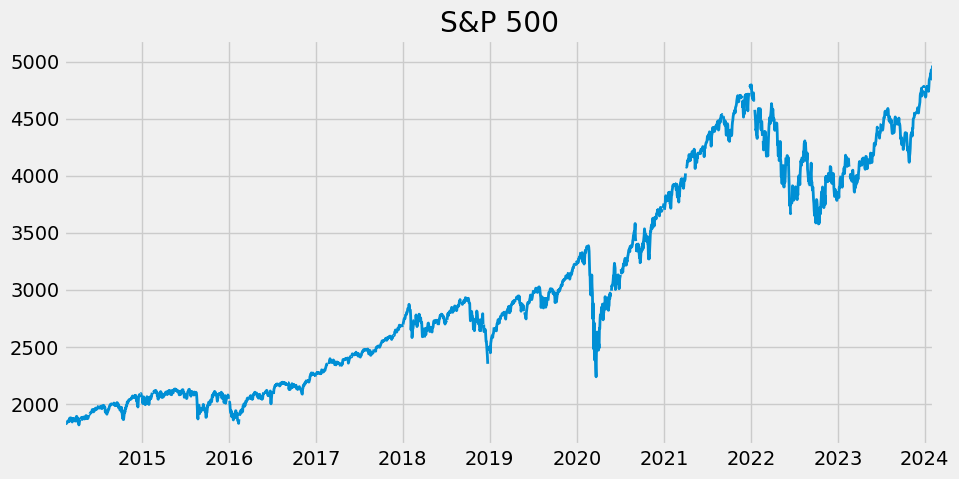

In [46]:
sp500.plot(figsize=(10,5), title="S&P 500",lw=2)

### Join multiple data series 

In [47]:
# only monthly frequency
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
# filter it more
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-02-12,2024-02-12,Unemployment Rate,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-02-12,2024-02-12,Unemployment Rate - Black or African American,1972-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:02-06:00,71,The series comes from the 'Current Population ...
CAUR,CAUR,2024-02-12,2024-02-12,Unemployment Rate in California,1976-01-01,2023-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-01-25 12:42:01-06:00,65,None
LNS14000024,LNS14000024,2024-02-12,2024-02-12,Unemployment Rate - 20 Yrs. & over,1948-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-02-02 07:49:06-06:00,58,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-02-12,2024-02-12,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...


In [54]:
# index are the different id
all_results = []

for myid in unemp_df.index:
    #get series for each id --> date and unemployment rate 
    results = fred.get_series(myid)
    # turn it to a data frame, name will be the id for each list
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
all_results[0]

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2023-09-01,3.8
2023-10-01,3.8
2023-11-01,3.7
2023-12-01,3.7


In [55]:
# they will get stacked side by side wwith indexes as dates, columns id, and values as employment rate
uemp_results = pd.concat(all_results, axis=1)
uemp_results.head()

,UNRATE,LNS14000006,CAUR,LNS14000024,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000031,TXUR,LNS14000002,NYUR,FLUR,U2RATE,LNS14000003,LNS14000009,OHUR,LNS14000001,MIUR,NCUR,LNS14027662,LNS14024887,LNS14027660,PAUR,MAUR,ALUR,ILUR,NJUR,VAUR,GAUR,TNUR,WIUR,AZUR,LRUN64TTUSM156S,IAUR,WAUR,COUR,KYUR,ORUR,MNUR,SCUR,MDUR,NMUR,LNS14032183,NVUR,LNS14000012,MOUR,LAUR,ARUR,LASMT261982000000003,LNS14027659,INUR,LNS14000060,UTUR,HIUR,PRUR,WVUR,OKUR,MTUR,MSUR,AKUR,CTUR,DCUR,MEUR,NDUR,WYUR,NEUR,LNS14000018,DEUR,KSUR,LASMT391746000000003,NHUR,IDUR,LNS14000028,VTUR,RIUR,SDUR,LNS14000036,CSOUUR,LNS14000032,LNS14000025,CMWRUR,LNS14024230,LNS14100000,LNS14000089,LRUN24TTUSM156S,LNS14027689,LRUNTTTTUSM156S,CNERUR,CWSTUR,LNS14200000,LNS14000026,LNS14000029,CNEWUR,LNS14000015,LNS14000315,LNS14000048,LRUN25TTUSM156S
1948-01-01,3.4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,3.0,NaN,2.9,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,2.6,NaN
1948-02-01,3.8,NaN,NaN,3.3,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,3.1,NaN,3.1,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,2.9,NaN
1948-03-01,4.0,NaN,NaN,3.5,NaN,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,NaN,NaN,3.3,NaN,3.0,NaN,2.9,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,2.8,NaN
1948-04-01,3.9,NaN,NaN,3.5,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,NaN,NaN,3.4,NaN,3.0,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,3.0,NaN
1948-05-01,3.5,NaN,NaN,3.3,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,NaN,NaN,3.2,NaN,3.1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,2.8,NaN


In [56]:
#drop columns UNRATE, 

cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()

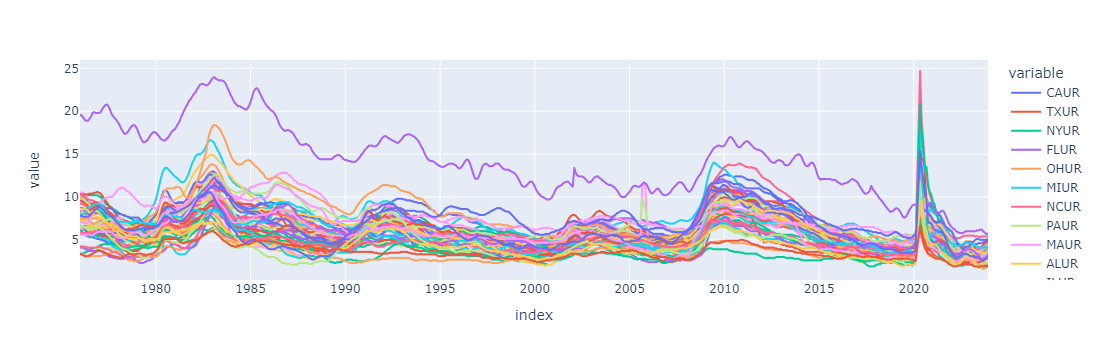

In [57]:
# plot states unemployment rate
px.line(uemp_states)

### Pull May 2020 unemployment rate per state

In [70]:
uemp_states.loc[uemp_states.index == '2020-05-01']

,CAUR,TXUR,NYUR,FLUR,OHUR,MIUR,NCUR,PAUR,MAUR,ALUR,ILUR,NJUR,VAUR,GAUR,TNUR,WIUR,AZUR,IAUR,WAUR,COUR,KYUR,ORUR,MNUR,SCUR,MDUR,NMUR,NVUR,MOUR,LAUR,ARUR,INUR,UTUR,HIUR,PRUR,WVUR,OKUR,MTUR,MSUR,AKUR,CTUR,DCUR,MEUR,NDUR,WYUR,NEUR,DEUR,KSUR,NHUR,IDUR,VTUR,RIUR,SDUR
2020-05-01,15.7,11.6,16.6,14.1,12.7,19.1,11.6,12.9,15.5,10.4,14.7,15.3,10.0,9.7,12.1,10.5,11.2,8.3,13.2,11.6,12.8,11.8,11.1,9.2,8.8,9.3,24.7,9.5,12.2,8.9,12.4,7.7,20.8,8.9,12.4,9.7,9.2,11.2,11.9,11.7,8.8,9.4,7.2,8.7,6.3,13.4,9.3,11.7,9.0,9.5,15.4,6.6


In [71]:
#flip the data set so each column is a state
uemp_states.loc[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01')

,2020-05-01
NEUR,6.3
SDUR,6.6
NDUR,7.2
UTUR,7.7
IAUR,8.3
WYUR,8.7
DCUR,8.8
MDUR,8.8
PRUR,8.9
ARUR,8.9


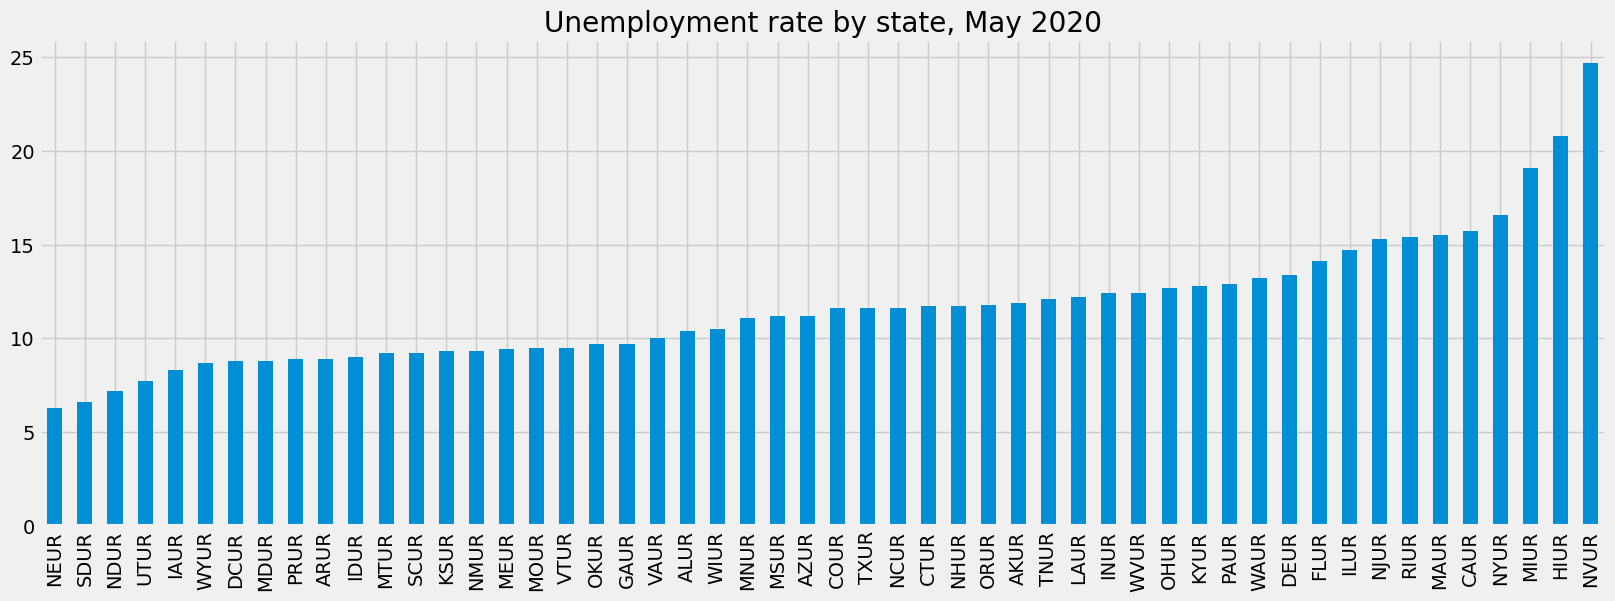

In [72]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
                                                    .plot(kind="bar",figsize=(18,6), title="Unemployment rate by state, May 2020")
ax.legend().remove()
plt.show()

### Change the states names to full name

In [82]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [75]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
uemp_states

,California,Texas,New York,Florida,Ohio,Michigan,North Carolina,Pennsylvania,Massachusetts,Alabama,Illinois,New Jersey,Virginia,Georgia,Tennessee,Wisconsin,Arizona,Iowa,Washington,Colorado,Kentucky,Oregon,Minnesota,South Carolina,Maryland,New Mexico,Nevada,Missouri,Louisiana,Arkansas,Indiana,Utah,Hawaii,Puerto Rico,West Virginia,Oklahoma,Montana,Mississippi,Alaska,Connecticut,the District of Columbia,Maine,North Dakota,Wyoming,Nebraska,Delaware,Kansas,New Hampshire,Idaho,Vermont,Rhode Island,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.1,9.9,6.4,8.0,10.5,6.6,6.6,10.3,6.1,8.4,6.0,5.8,10.2,4.3,8.5,5.8,5.6,9.5,6.0,7.4,6.4,8.6,9.2,5.9,6.3,7.3,6.6,5.8,9.8,19.6,7.5,5.8,5.8,6.7,7.1,9.8,8.7,8.7,3.4,4.1,3.3,8.0,4.2,6.5,5.6,8.6,7.8,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,9.9,6.4,8.1,10.5,6.6,6.6,10.3,6.1,8.4,6.0,5.8,10.2,4.3,8.5,5.7,5.6,9.5,6.0,7.4,6.4,8.7,9.2,5.9,6.3,7.3,6.6,5.9,9.8,19.5,7.5,5.8,5.8,6.7,7.1,9.8,8.7,8.7,3.4,4.1,3.3,8.0,4.2,6.5,5.6,8.6,7.8,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,9.9,6.4,8.1,10.5,6.6,6.6,10.3,6.1,8.4,6.0,5.7,10.1,4.3,8.4,5.7,5.6,9.4,5.9,7.3,6.4,8.7,9.2,5.9,6.3,7.3,6.5,5.8,9.8,19.3,7.5,5.8,5.8,6.6,7.0,9.8,8.6,8.6,3.4,4.1,3.3,8.0,4.2,6.5,5.6,8.6,7.7,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.0,9.8,6.3,8.1,10.3,6.5,6.6,10.3,6.0,8.3,6.0,5.6,10.0,4.2,8.5,5.6,5.6,9.2,5.8,7.2,6.4,8.6,9.0,6.0,6.4,7.2,6.3,5.8,9.7,19.0,7.5,5.8,5.8,6.4,6.9,9.6,8.5,8.6,3.5,4.0,3.2,8.1,4.2,6.5,5.6,8.6,7.7,3.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,9.6,6.1,8.1,10.1,6.4,6.6,10.3,5.9,8.1,5.9,5.5,9.8,4.1,8.5,5.6,5.5,9.1,5.7,7.0,6.5,8.6,8.9,6.0,6.5,7.1,6.0,5.7,9.4,18.9,7.4,5.7,5.8,6.3,6.9,9.4,8.4,8.5,3.6,3.9,3.1,8.3,4.2,6.5,5.6,8.5,7.7,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,4.6,4.1,3.9,2.7,3.4,3.7,3.3,3.5,2.6,2.1,4.1,4.2,2.5,3.3,3.1,2.9,3.8,2.9,3.6,3.1,4.0,3.4,3.1,3.0,1.7,3.7,5.4,2.8,3.3,2.7,3.4,2.5,2.8,6.2,3.6,2.8,2.5,3.2,3.9,3.5,5.0,2.5,1.9,2.9,2.0,4.1,2.7,1.8,3.0,1.8,2.7,1.9
2023-09-01,4.7,4.1,4.0,2.8,3.4,3.9,3.4,3.4,2.6,2.2,4.4,4.4,2.5,3.4,3.2,3.1,4.0,3.0,3.6,3.2,4.1,3.5,3.1,2.9,1.6,3.7,5.4,2.9,3.3,2.9,3.6,2.6,2.8,6.0,3.8,3.0,2.7,3.2,4.1,3.5,5.0,2.7,1.9,2.9,2.1,4.1,2.8,2.0,3.1,1.9,2.6,1.9
2023-10-01,4.8,4.1,4.2,2.8,3.6,4.1,3.4,3.4,2.8,2.3,4.6,4.6,2.7,3.4,3.3,3.2,4.2,3.2,3.8,3.3,4.2,3.6,3.2,2.9,1.7,3.8,5.4,3.1,3.3,3.1,3.6,2.7,2.9,5.8,4.0,3.2,2.8,3.3,4.3,3.5,5.0,2.8,1.9,2.9,2.2,4.2,2.9,2.1,3.2,2.0,2.7,2.0
2023-11-01,4.9,4.1,4.3,2.9,3.6,4.3,3.5,3.4,2.9,2.4,4.7,4.7,2.9,3.4,3.5,3.3,4.3,3.3,4.0,3.3,4.3,3.6,3.1,3.0,1.8,3.9,5.4,3.2,3.5,3.3,3.7,2.8,2.9,5.7,4.2,3.3,3.0,3.3,4.4,3.6,5.0,3.0,1.9,3.0,2.3,4.2,2.9,2.3,3.3,2.1,2.9,2.0


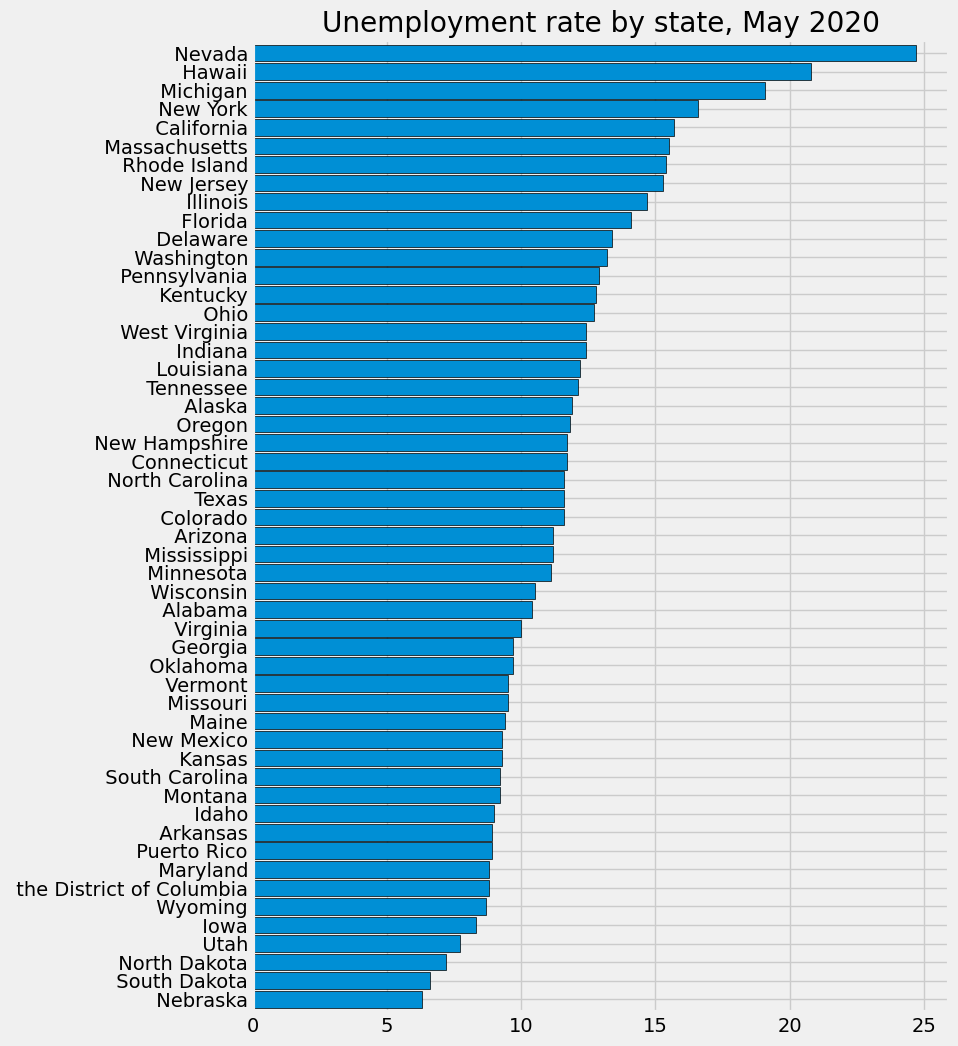

In [84]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
                                                    .plot(kind="barh",figsize=(8,12), width=.9,edgecolor='black', title="Unemployment rate by state, May 2020")
ax.legend().remove()
plt.show()

### Pull partition rate

In [87]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [95]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

### Plot Unemployment Vs Participation

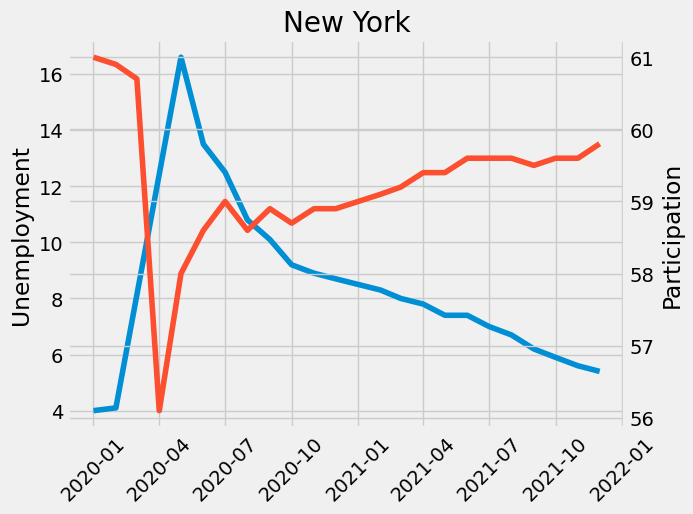

In [129]:
fig, ax = plt.subplots()

unemployment_data = uemp_states[(uemp_states.index >= '2020') & (uemp_states.index < '2022')][' New York']
ax.plot(unemployment_data.index, unemployment_data.values, label='Unemployment')
ax.set_ylabel('Unemployment')

ax2 = ax.twinx()

participation_data = part_states[(part_states.index >= '2020') & (part_states.index < '2022')]['New York']
ax2.plot(participation_data.index, participation_data.values, label='Participation', color=color_pal[1])
ax2.set_ylabel('Participation')

ax.tick_params(axis='x', rotation=45)
ax.set_title('New York')

plt.show()